<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="7"><p style="text-align:center"><b>**Анализ рынка российского кинопроката и выявление текущих трендов** </b></p></font>

# 1 Читаем файлы, выводим общую информацию

In [1]:
import warnings
from numpy import nan
# Отключаем все предупреждения
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
pd.options.display.float_format = '{:,.1f}'.format
data_tmp = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
display(data.info())
display(data_tmp.info())
display(data.head())
display(data_tmp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


У двух датасетов есть общее поле **puNumber**, но при этом данное поле имеет разный тип

## Объединяем датасеты

In [2]:
data = data.rename(columns={'puNumber': 'pu_number'})
data_tmp = data_tmp.rename(columns={'puNumber': 'pu_number'})

In [3]:
display(data[data['pu_number'].duplicated()]) #находит два дулбя 221154310 и 221054410
display(data_tmp.query('pu_number in ("221154310","221054410")')) #в таблице mkrf_shows таких нет
data = data.drop_duplicates('pu_number') #можем удалять так как нет критичной инорфмации

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


,pu_number,box_office


In [4]:
#приводим к одному типу данных поле 'pu_number'
data['pu_number'] = data['pu_number'].astype('str')
data_tmp['pu_number'] = data_tmp['pu_number'].astype('str')

#объединяем таблицы
data_union = pd.merge(data, data_tmp, on='pu_number', how='left')

In [5]:
#проверяем что в итоговой таблице не потеряли записи
data_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   pu_number              7484 non-null   object 
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6916 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6517 non-null   object 
 14  genres                 6508 non-null   object 
 15  box_

# 2 Предобработка данных

## Проверяем типы данных, проверяем дубликаты, изучаем пропуски

### Анализируем дубли

In [7]:
#сжимаем пробелы и после этого ищем не явные дубли
for col in data_union:
    try:
        data_union[col] = data_union[col].str.strip()
    except:
        pass

for col in data_union:
    if len(data_union[col].unique()) < 30:
        print(col, data_union[col].unique())

type ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']
age_restriction ['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']
financing_source [nan 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


In [8]:
data_union = data_union.drop_duplicates()

In [9]:
data_union[(data_union['title'].duplicated(keep=False)) & (data_union['box_office'].isna()) & (data_union['budget'].isna())]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03T12:00:00.000Z,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03T12:00:00.000Z,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,Ночь живых мертвецов,121029119,2019-10-30T12:00:00.000Z,Художественный,"Имейдж Тен, Лаурель Групп, Маркет Скьяр Продакшнз",США,Джордж А.Ромеро,"Расселл Страйнер, Карл Хардмен",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.3,"ужасы,триллер",NaN
7311,Безумный Макс: Дорога ярости,121030019,2019-12-06T12:00:00.000Z,Художественный,Уорнер Бразерс Пикчерс,"Австралия, США",Джордж Миллер,"Джордж Миллер, Даг Митчелл, Брюс Берман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.8,"боевик,фантастика,приключения",NaN
7367,Невиновен,111019319,2019-11-07T12:00:00.000Z,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7414,"Отель ""Гранд Будапешт""",121035119,2019-12-13T12:00:00.000Z,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN


In [10]:
ind = data_union[(data_union['title'].duplicated()) & (data_union['box_office'].isna()) & (data_union['budget'].isna())].index

In [11]:
data_union = data_union.drop(ind)
data_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6913 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6913 non-null   object 
 1   pu_number              6913 non-null   object 
 2   show_start_date        6913 non-null   object 
 3   type                   6913 non-null   object 
 4   film_studio            6896 non-null   object 
 5   production_country     6911 non-null   object 
 6   director               6904 non-null   object 
 7   producer               6354 non-null   object 
 8   age_restriction        6913 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                5955 non-null   object 
 14  genres                 5946 non-null   object 
 15  box_offic

Выборка уменьшилась на 500 строк или 7%

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

### Переводим в тысячи

In [12]:
#переводим руб. в тыс.руб. - проще анализировать
array = ['refundable_support','nonrefundable_support','budget','box_office']
for i in array:
    try:
        data_union[[i]] = data_union[[i]] / 1000
        data_union[[i]] = data_union[[i]].round(decimals=0)
        data_union[[i]] = data_union[[i]].astype('int')
    except:
        pass

### Меняем тип данных даты проката

In [13]:
#переводим текст в дату
data_union['show_start_date']= data_union['show_start_date'].str[:10]
data_union['show_start_date'] = pd.to_datetime(data_union['show_start_date'])

### Обрабатываем рейтинги

In [14]:
data_union['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [15]:
data_union = data_union.reset_index(drop=True) #на всякий случай сбрасываем индексы

#циклом ищем проценты и помечаем к удалению
count = 0
r = 0
for i in data_union['ratings']:  
    try:
        if '%' in i:
            data_union.loc[count,'ratings'] = 'delete'
    except:
        pass
    count+=1

#data_union['ratings'] = data_union['ratings'].fillna('0') #null меняем на 0


In [16]:
data_union = data_union.drop(data_union.query('ratings == "delete"').index)

In [17]:
data_union['ratings'] = data_union['ratings'].astype(float).round(decimals=2) #переводим тип в числа

In [18]:
data_union['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [19]:
data_union = data_union.replace('«16+» - для детей старше 16 лет', '«16+»')
data_union = data_union.replace('«18+» - запрещено для детей', '«18+»')
data_union = data_union.replace('«0+» - для любой зрительской аудитории', '«0+»')
data_union = data_union.replace('«6+» - для детей старше 6 лет', '«6+»')
data_union = data_union.replace('«12+» - для детей старше 12 лет', '«12+»')

### Исследуем колонки 'film_studio', 'production_country', 'director', 'producer',  'genres'

#### film_studio

In [20]:
data_union.query('film_studio.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1197,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+»,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4165,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+»,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
5571,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5647,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5839,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5858,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+»,NaN,NaN,NaN,NaN,NaN,NaN,41.0
5943,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+»,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
5952,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5955,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5956,В плену города грёз,112014818,2018-12-06,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+»,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,триллер",NaN


Не представляется возможным сделать однозначный вывод с чем связаны пропуски. Заполняем пропуски значением "прочее"

In [21]:
data_union.loc[data_union['film_studio'].isna(), 'film_studio'] = 'прочее'
data_union['film_studio'].isna().sum()

0

#### production_country

In [22]:
display(data_union['production_country'].unique())
data_union.query('production_country.isna()')

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2999,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+»,NaN,NaN,NaN,NaN,7.2,"детский,комедия",195.0
4165,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,прочее,NaN,NaN,NaN,«0+»,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Заменяем пропуски на значение "Россия"

In [23]:
data_union.loc[data_union['production_country'].isna(), 'production_country'] = 'Россия'
data_union['production_country'].isna().sum()

0

#### director

In [24]:
data_union.query('director.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
707,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,44.0
1607,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3651,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3844,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4146,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+»,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4165,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,прочее,Россия,NaN,NaN,«0+»,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4518,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4536,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+»,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Не представляется возможным заполнить пропуски. Заполняем пропуски значением "прочие"

In [25]:
data_union.loc[data_union['director'].isna(), 'director'] = 'прочие'
data_union['director'].isna().sum()

0

#### producer

In [26]:
data_union.query('producer.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+»,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+»,NaN,NaN,NaN,NaN,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+»,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",3.0
7,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+»,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
9,Ответный ход,111019014,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+»,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,Отряд специального назначения,111020419,2019-12-01,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+»,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
6835,Назначаешься внучкой,111020519,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+»,NaN,NaN,NaN,NaN,7.0,военный,NaN
6836,Перед рассветом,111020619,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+»,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
6837,Ты помнишь,111020719,2019-12-01,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+»,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


In [27]:
data_union.query('producer.isna()').pivot_table(
    index='production_country', values='pu_number', aggfunc='count'
).sort_values(by='pu_number')

,pu_number
production_country,
"СССР, Албания",1
"Россия, Казахстан, США",1
"Румыния, ЮАР, Иран, Франция, Канада, Великобритания",1
Франция-Австралия,1
СССР - Швейцария - Франция,1
...,...
Италия,17
США,21
Великобритания,33


На СССР приходится наибольшее кол-во пропусков в части продюсеров, но тем не менее не представляется возможным заполнить пропуски. Заполняем пропуски значением "прочие"

In [28]:
data_union.loc[data_union['producer'].isna(), 'producer'] = 'прочие'
data_union['producer'].isna().sum()

0

#### genres

In [29]:
display(data_union.query('genres.isna()'))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
40,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",прочие,«6+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,прочие,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,прочие,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,Эколав,111023219,2019-12-26,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6907,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+»,NaN,NaN,NaN,NaN,NaN,NaN,220.0
6908,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6910,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+»,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Массив данных слишком большой для заполнения вручную. Напишем в адрес заказчика, чтобы предоставляли более качественные данные.

Заполним пропуски значениями "прочие"

In [30]:
data_union.loc[data_union['genres'].isna(), 'genres'] = 'прочие'
data_union['genres'].isna().sum()

0

In [31]:
data_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6884 non-null   object        
 1   pu_number              6884 non-null   object        
 2   show_start_date        6884 non-null   datetime64[ns]
 3   type                   6884 non-null   object        
 4   film_studio            6884 non-null   object        
 5   production_country     6884 non-null   object        
 6   director               6884 non-null   object        
 7   producer               6884 non-null   object        
 8   age_restriction        6884 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

## Строим гисторгаммы по количественным данным. Ищем аномальные значения

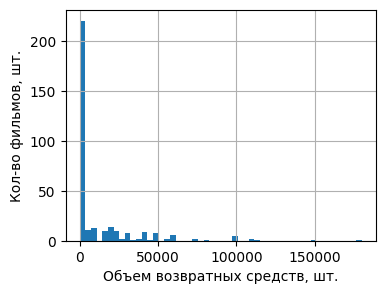

In [32]:
data_union['refundable_support'].hist(figsize=(4,3),bins=50)
plt.ylabel('Кол-во фильмов, шт.')
plt.xlabel('Объем возвратных средств, шт.')
plt.show()

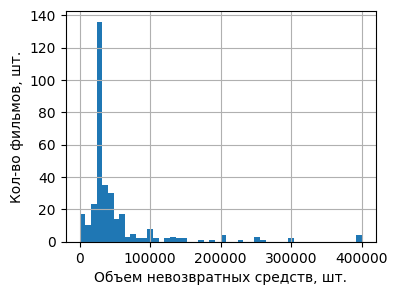

In [33]:
data_union['nonrefundable_support'].hist(figsize=(4,3),bins=50)
plt.ylabel('Кол-во фильмов, шт.')
plt.xlabel('Объем невозвратных средств, шт.')
plt.show()

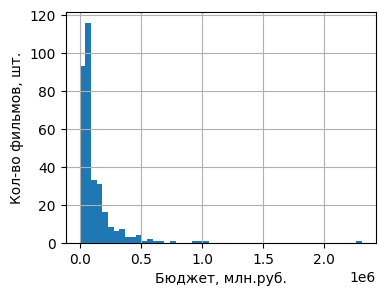

In [34]:
data_union['budget'].hist(figsize=(4,3),bins=50)
plt.ylabel('Кол-во фильмов, шт.')
plt.xlabel('Бюджет, млн.руб.')
plt.show()

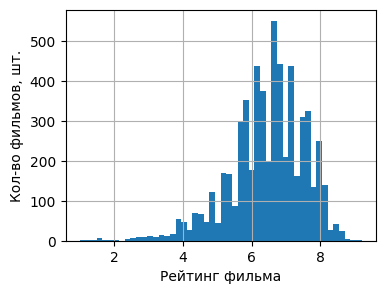

In [35]:
data_union['ratings'].hist(figsize=(4,3),bins=50)
plt.ylabel('Кол-во фильмов, шт.')
plt.xlabel('Рейтинг фильма')
plt.show()

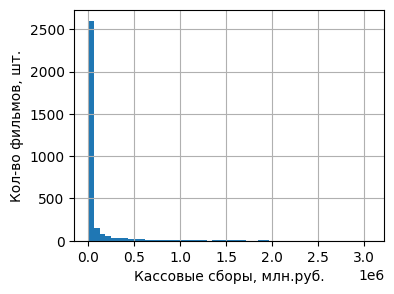

In [36]:
data_union['box_office'].hist(figsize=(4,3),bins=50)
plt.ylabel('Кол-во фильмов, шт.')
plt.xlabel('Кассовые сборы, млн.руб.')
plt.show()

По всей видимости есть аномальные значения и это нормально. Единичные фильмы могут приносить больший доход, чем все остальные вместе взятые. 
В части рейтингов гистограмма приняла почти идеальное нормальное распределение, хотя в целом ретийнгов "1" и "2" не видел, надо проверить.

In [37]:
data_union[['ratings','title','producer']].query('0<ratings<4').head()

,ratings,title,producer
81,2.4,Блондинка и блондинка,"Джефри Бармаш, Кирк Шоу"
442,2.6,Тот еще...!,Г.Малков
450,3.8,901 километр,"А.Крутов, Л.Кашин"
489,3.0,Ржевский против Наполеона,"ООО ""Квартал Леополис"""
490,1.6,Ночь в супермаркете,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич..."


**Данные корректны**

In [38]:
data_union['box_office'].describe()

count       3,143.0
mean       76,671.6
std       240,738.0
min             0.0
25%            88.0
50%         2,352.0
75%        24,139.0
max     3,073,569.0
Name: box_office, dtype: float64

### Анализируем фильмы с аномально низкими кассовыми сборами и высокми рейтингом

In [39]:
data_union.query('100>box_office>0 and ratings > 7').sort_values(by='box_office')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1636,Ромео и Джульетта /По мотивам пьесы У.Шекспира/,121016913,2013-07-03,Художественный,Фэктори Фикшн,Новая Зеландия,Тим ван Даммен,"Аластер Карратерс, Майкл А.Дж.О'Нилл",«12+»,NaN,NaN,NaN,NaN,8.2,"драма,мелодрама",1.0
4614,"Детский юмористический киножурнал ""Ералаш"". Вы...",111005311,2011-08-08,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, Ф.Кривошеев, М.Сулейманов...","ООО ""Ералаш""",«0+»,NaN,NaN,NaN,NaN,7.2,"детский,комедия",1.0
2681,Зверополис,224002216,2016-06-07,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+»,NaN,NaN,NaN,NaN,8.3,"мультфильм,комедия,криминал",1.0
260,Раба любви,111007713,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Михалков,прочие,«12+»,NaN,NaN,NaN,NaN,7.7,"драма,мелодрама,комедия",1.0
4570,Один день-,121014911,2011-08-10,Художественный,"Колор Форс, Филм Фор, Рандом Хаус Филмз",США,Лоне Шерфиг,Нина Джейкобсон,«16+»,NaN,NaN,NaN,NaN,7.7,"драма,мелодрама",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Артист.,121001712,2012-01-25,Художественный,"Франс 3 Синема, ДжиДи Про, Ла Класс Американе,...",Франция-Бельгия,Мишель Хазанавичус,"Тома Лангманн, Эммануэль Монтамат, Джернми Бурдек",«0+»,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама,комедия",82.0
3320,Остров лемуров: Мадагаскар 3D.,126004316,2016-08-11,Прочие,"Аймакс, Уорнер Бразерс",США - Канада,Дэвид Дуглас,Дрю Фелман,«0+»,NaN,NaN,NaN,NaN,7.9,"мультфильм,комедия,приключения",82.0
3440,Фанат (2016),121032516,2016-12-08,Художественный,"Формула Филм, Рэдчилиз, Яш Рай Филмз",Индия,Маниш Шарма,Адитья Чопра,«12+»,NaN,NaN,NaN,NaN,7.4,"боевик,триллер,драма",84.0
639,Дочь,111004712,2012-09-25,Художественный,"ОАО ""ТПО ""Киностудия им. М.Горького"", ООО ""Вал...",Россия,"А.Касаткин, Н.Назарова","С.Зернов, С.Кучмаева",«16+»,NaN,NaN,NaN,NaN,7.6,"драма,детектив,криминал",85.0


In [40]:
data_union['box_office'].describe()

count       3,143.0
mean       76,671.6
std       240,738.0
min             0.0
25%            88.0
50%         2,352.0
75%        24,139.0
max     3,073,569.0
Name: box_office, dtype: float64

In [41]:
#data_union = data_union.dropna(subset=['box_office'])

In [42]:
# check
data_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6884 non-null   object        
 1   pu_number              6884 non-null   object        
 2   show_start_date        6884 non-null   datetime64[ns]
 3   type                   6884 non-null   object        
 4   film_studio            6884 non-null   object        
 5   production_country     6884 non-null   object        
 6   director               6884 non-null   object        
 7   producer               6884 non-null   object        
 8   age_restriction        6884 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

In [43]:
#data_union = data_union.drop(data_union.query('100>box_office>0 and ratings > 7').index)
change = data_union.query('100>box_office>0 and ratings > 7')['box_office']
data_union = data_union.replace(to_replace=change, value=None)

In [44]:
# check
data_union.query('100>box_office>0 and ratings > 7')['box_office']

4       3.0
36      1.0
44     23.0
49      2.0
65      2.0
       ... 
4861    9.0
5578   56.0
6592   74.0
6593   75.0
6643   38.0
Name: box_office, Length: 205, dtype: float64

In [45]:
data_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6884 non-null   object        
 1   pu_number              6884 non-null   object        
 2   show_start_date        6884 non-null   datetime64[ns]
 3   type                   6884 non-null   object        
 4   film_studio            6884 non-null   object        
 5   production_country     6884 non-null   object        
 6   director               6884 non-null   object        
 7   producer               6884 non-null   object        
 8   age_restriction        6884 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  ratings 

## Добавляем новые столбцы

In [46]:
#добавляем год проката
data_union['year'] = data_union['show_start_date'].dt.year

### Имя главного продюссера

In [47]:
# цикл перебирает все значения из колонки 'producer' датасета data_union. 
# Находим первую запятую, и в новую кололнку добавляем значение до этой запятой
# Если запятой нет, берем полностью значение из колонки producer'

data_union['producer_main']='' #создаем пустую колонку

count = 0
while count < data_union['pu_number'].count(): #находим количество строк в датасете и ограничиваем цикл
    count += 1
    try:
        a = data_union.loc[count,'producer']
        b = a.find(',')
        if b > 0:
            data_union.loc[count, 'producer_main'] = a[:b]
        else:
            data_union.loc[count, 'producer_main'] = data_union.loc[count, 'producer']
    except:
        data_union.loc[count, 'producer_main'] = 'Nan'

In [48]:
#сопоставляем результат с исходными данными
print(data_union[['producer','producer_main']].head(20))

                                             producer           producer_main
0           Дэвид Валдес, Кевин Костнер, Джейк Эбертс                        
1                                              прочие                  прочие
2   Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит              Джим Лемли
3                                              прочие                  прочие
4                                              прочие                  прочие
5                         Джон Пенотти, Джон Туртурро            Джон Пенотти
6                                         Патрис Леду             Патрис Леду
7                                              прочие                  прочие
8          Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг           Патрик Кроули
9                                              прочие                  прочие
10  Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...            Клинт Иствуд
11                             Саймон Чэннинг Уильямс  Саймон Чэ

### Название основного жанра

In [49]:
# аналогично создаем колонку с основным жанром фильма

data_union['genres_main']='' #создаем пустую колонку

count = 0
while count < data_union['pu_number'].count(): #находим количество строк в датасете и ограничиваем цикл на это количество строк
    count += 1
    try:
        a = data_union.loc[count,'genres']
        b = a.find(',')
        if b > 0:
            data_union.loc[count, 'genres_main'] = a[:b]
        else:
            data_union.loc[count, 'genres_main'] = data_union.loc[count, 'genres']
    except:
        data_union.loc[count, 'genres_main'] = 'Nan'

## Находим долю государственной поддержки от общего бюджета фильма

In [50]:
# проверяем, что поля 'refundable_support' и 'refundable_support' имеют одинаковое наполнение 
# чтобы можно было их складывать
display(data_union.query('refundable_support.isnull() and nonrefundable_support >= 0'))
display(data_union.query('nonrefundable_support.isnull() and refundable_support >= 0'))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,producer_main,genres_main


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,producer_main,genres_main


In [51]:
data_union['financing_source_perc'] = \
    (data_union['refundable_support'] + data_union['nonrefundable_support']) / data_union['budget']

# 3 Исследовательский анализ данных

## Смотрим сколько фильмов выходило в год

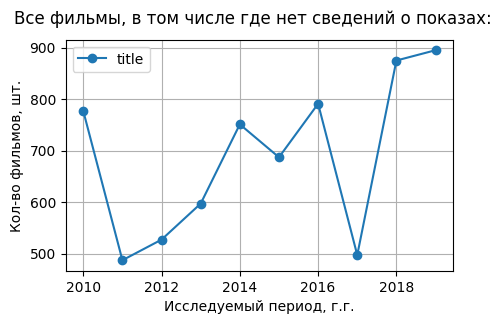

In [52]:
data_union.pivot_table(
index='year',values='title',aggfunc='count'
).plot(y='title',style='o-', figsize=(5, 3), grid=True)
plt.suptitle('Все фильмы, в том числе где нет сведений о показах:')
plt.xlabel('Исследуемый период, г.г.')
plt.ylabel('Кол-во фильмов, шт.')
plt.show()

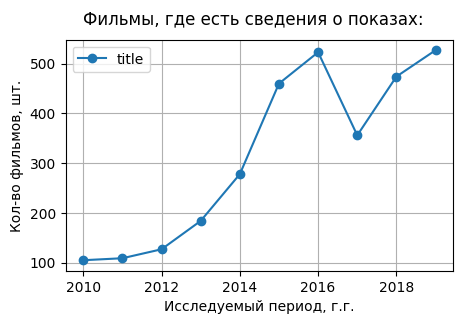

In [53]:
data_union.query('box_office>=0').pivot_table(
index='year',values='title',aggfunc='count'
).plot(y='title',style='o-', figsize=(5, 3), grid=True)
plt.suptitle('Фильмы, где есть сведения о показах:')
plt.xlabel('Исследуемый период, г.г.')
plt.ylabel('Кол-во фильмов, шт.')
plt.show()

## Оцениваем долю фильмов с указанной информацией о прокате в кинотеатрах

In [54]:
def inf(boxoffice):
    try:
        if boxoffice>=0:
            return 1
        else:
            return 0
    except:
        pass
data_union['info'] = data_union['box_office'].apply(inf)

In [55]:
data_union.pivot_table(
    index='year', values='info', aggfunc = ['count', 'sum', 'mean']).style.format({('mean', 'info') : '{:.1%}'}
)

,count,sum,mean
,info,info,info
year,,,
2010.000000,777,105,13.5%
2011.000000,487,109,22.4%
2012.000000,527,127,24.1%
2013.000000,597,184,30.8%
2014.000000,751,278,37.0%
2015.000000,687,460,67.0%
2016.000000,791,523,66.1%
2017.000000,497,356,71.6%


<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
Доля фильмов, по которым имеются сведения о показах в российских кинотеатрах росла на протяжении периода с 2010 по 2017 годы с 14% до 72%.
Затем эта доля снизилась с 2017 по 2019 год с 72% до 59%.
Таким образом, наиболее полная информация о показах была в 2017 году.

## Изучаем динамику суммы сборов фильмов

In [56]:
data_union.pivot_table(
    index='year', values='box_office', aggfunc = ['sum','mean','median']
).style.format({('sum', 'box_office') : "{:.1f}", ('mean', 'box_office') : "{:.1f}", \
                ('median', 'box_office') : "{:.1f}"})

,sum,mean,median
,box_office,box_office,box_office
year,,,
2010.000000,2431.0,23.2,2.0
2011.000000,14097.0,129.3,3.0
2012.000000,6947.0,54.7,6.0
2013.000000,29802.0,162.0,4.0
2014.000000,7444944.0,26780.4,19.0
2015.000000,38966070.0,84708.8,5003.5
2016.000000,47862923.0,91516.1,4001.0
2017.000000,48563663.0,136414.8,10177.5


<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
На протяжении почти всего исследуемого периода кассовые сборы росли.
В 2019 году сборы были максимильные и составили 49.6 млрд. руб.
В 2010 году сборы были на минимуме и составили 2.4 млн. руб.

В разрезе каждого года медианные значения кассовых сборов значительно ниже своих средних значений. Это говорит о том, что основную долю кассовых сборов как правило занимают единичные блокбастеры, а остальные фильмы в большинстве своем приносят незначительный доход в общий объем сборов

## Определем, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год

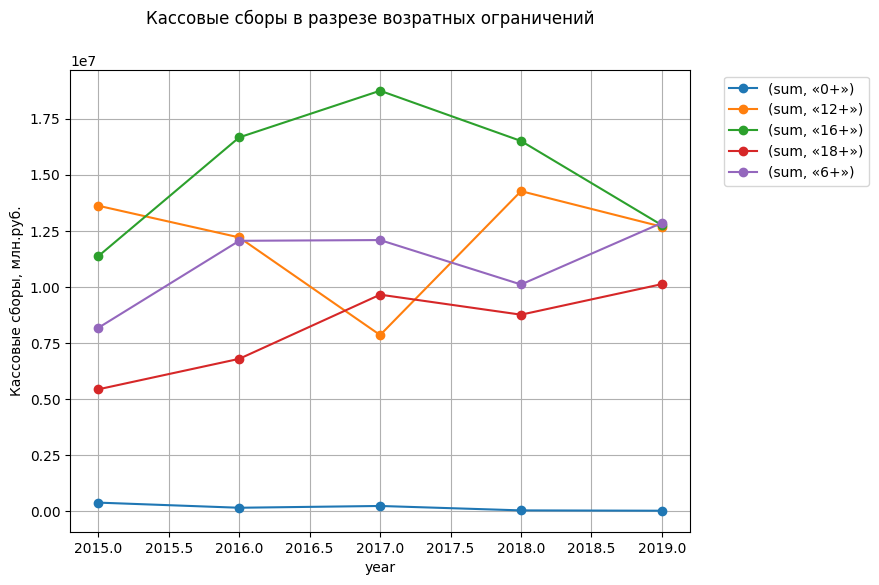

sum                                                      \
age_restriction      «0+»        «12+»        «16+»        «18+»         «6+»   
year                                                                            
2,015.0         379,052.0 13,616,087.0 11,367,316.0  5,430,881.0  8,172,734.0   
2,016.0         150,226.0 12,204,447.0 16,664,466.0  6,790,638.0 12,053,146.0   
2,017.0         229,599.0  7,851,390.0 18,745,043.0  9,651,488.0 12,086,143.0   
2,018.0          32,449.0 14,267,290.0 16,503,603.0  8,758,499.0 10,104,975.0   
2,019.0          17,746.0 12,680,198.0 12,748,817.0 10,121,797.0 12,852,511.0   
 All            809,072.0 60,619,412.0 76,029,245.0 40,753,303.0 55,269,509.0   

                               
age_restriction           All  
year                           
2,015.0          38,966,070.0  
2,016.0          47,862,923.0  
2,017.0          48,563,663.0  
2,018.0          49,666,816.0  
2,019.0          48,421,069.0  
 All            233,480,541.0

In [57]:
data_union.query('2015<=year<=2019').pivot_table(
    index='year', columns='age_restriction', values='box_office', aggfunc=['sum']
).plot(style='o-', figsize=(8, 6), grid=True)
plt.legend(loc='upper right',  bbox_to_anchor=(1.3,1))
plt.suptitle('Кассовые сборы в разрезе возратных ограничений')
plt.ylabel('Кассовые сборы, млн.руб.')
plt.show()

data_union.query('2014<year<2020').pivot_table(
    index='year', columns='age_restriction', values='box_office', aggfunc=['sum'], margins=True
)

<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
В период с 2015 по 2019 годы наибольшие сборы в разрезе возрастных категорий составили 76 млрд.руб. и пришлись на фильмы категории «16+» - для детей старше 16 лет.

На протяжении всего периода фильмы данной возрастной категории занимали наибольшую долю. В основном это фильмы Марвел.
Но в 2019 году доля фильмов категории «16+» сравнялась с долями фильмов категорий «6+» и «12+». 
Вероятно это связано с:
* выходом в прокат мощнейших ультраблокбастеров в жанре комедия (Холоп), фантастика и мультфильмов (Малефисента), которые своей мощью затмили Марвел.  
* увеличением качества и уровня съемок семейных фильмов/мультфильмов, на которые ходят семьями
* ужесточением контроля возрастной категории, то есть детей перестали пускать на фильмы «16+»

In [59]:
data_union.query('year==2019')[['title','box_office','age_restriction','ratings','production_country']].sort_values(by='box_office',ascending=False).head(10)

,title,box_office,age_restriction,ratings,production_country
6883,Холоп,"3,073,569.0",«12+»,6.8,Россия
6272,Мстители: Финал,"2,576,614.0",«16+»,7.6,США
6654,Малефисента: Владычица тьмы,"1,911,945.0",«6+»,6.9,США
6694,Джокер,"1,890,368.0",«18+»,8.0,США - Канада
6812,Холодное сердце II,"1,827,245.0",«6+»,7.1,США
6170,Как приручить дракона 3,"1,689,541.0",«6+»,7.7,США
6402,Тайная жизнь домашних животных 2,"1,478,921.0",«6+»,6.8,"США, Франция, Япония"
6499,Человек-Паук: Вдали от дома,"1,203,696.0",«12+»,7.2,США
6182,Капитан Марвел,"1,144,426.0",«16+»,6.5,США
6550,Однажды... в Голливуде,"1,121,949.0",«18+»,5.9,США - Великобритания - КНР


In [60]:
data_union.query('2014<year<2020').pivot_table(
    index='age_restriction', columns='year', values='box_office', aggfunc=['mean'], margins=True
)

mean                                                  
year              2,015.0   2,016.0   2,017.0   2,018.0   2,019.0       All
age_restriction                                                            
«0+»              9,719.3   3,664.0  76,533.0   6,489.8   5,915.3   8,890.9
«12+»           186,521.7 148,834.7 196,284.8 212,944.6 149,178.8 174,695.7
«16+»            68,477.8  92,068.9 154,917.7 105,792.3  72,436.5  95,036.6
«18+»            41,457.1  45,574.8  65,656.4  49,205.1  55,310.4  51,717.4
«6+»            160,249.7 172,187.8 268,581.0 148,602.6 160,656.4 176,017.5
All              84,708.8  91,516.1 136,414.8 104,782.3  91,880.6  99,778.0

Средние продажи категории 12+ составили 227 млн. руб. за исследуемый период (пик пришелся на 2018 год), в категории 0+ - 13 млн. руб. (пик пришелся на 2018 год).

# 4 Анализиурем фильмы с гос. поддержкой
Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг. 


In [61]:
data_union['support'] = data_union['refundable_support'] + data_union['nonrefundable_support']
gos_film = data_union.query('support>0') #оставляем фильмы с гос поддержкой

In [62]:
#смотрим по всем ли фильмам можем посмотреть прибыльность
gos_film[['title','box_office','support']].sort_values(by='support', ascending=False).head(10)

,title,box_office,support
6901,Вторжение,NaN,"500,000.0"
6891,Союз спасения,"717,703.0","500,000.0"
3163,Дуэлянт,"364,285.0","450,000.0"
2741,Экипаж .,"1,402,255.0","442,104.0"
5123,Движение вверх,"2,779,686.0","400,000.0"
5039,Легенда о Коловрате,"590,405.0","350,000.0"
6335,Девятая,"55,877.0","300,000.0"
3265,Ледокол,"337,070.0","300,000.0"
4908,Матильда,"511,776.0","300,000.0"
6555,Тайна Печати Дракона,"333,597.0","270,000.0"


Отсутсвтует значение по фильму "Вторжение" с наибольшим бюджетом. Заполняем данными из интернета

In [63]:
gos_film.loc[7474,'box_office'] = 100 #(по курсу 60)

In [64]:
gos_film['budget']

1186    79,412.0
1341    37,143.0
1388   176,023.0
1411    40,574.0
1663    40,015.0
          ...   
6893   190,000.0
6901   944,000.0
6903    46,154.0
6905   150,148.0
7474         NaN
Name: budget, Length: 331, dtype: float64

In [65]:
#находим прибыль
gos_film['revenue'] = gos_film['box_office'] - gos_film['budget']

### Смотрим динамику гос поддержки в разрезе годов и фондов

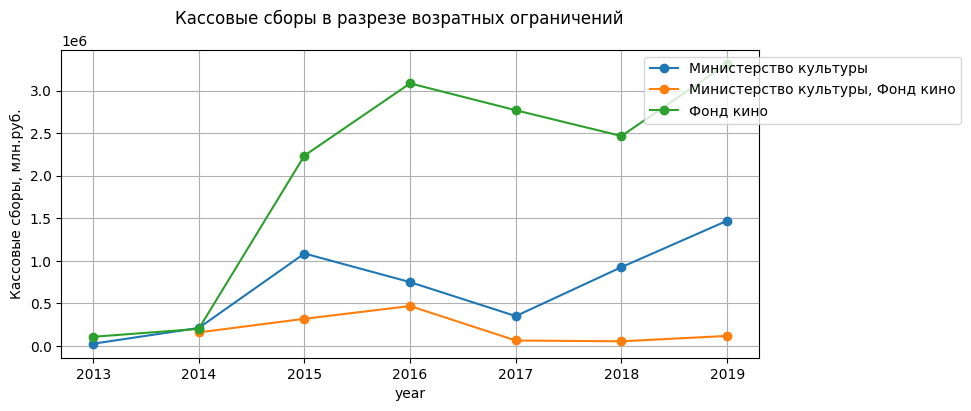

In [66]:
gos_film.pivot_table(
    index='year',columns='financing_source', values='support', aggfunc='sum'#, margins=True
).plot(style='o-', figsize=(9, 4), grid=True)
plt.legend(loc='upper right',  bbox_to_anchor=(1.3,1))
plt.suptitle('Кассовые сборы в разрезе возратных ограничений')
plt.ylabel('Кассовые сборы, млн.руб.')
plt.show()


<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
В основном финансирование осуществляется за счет бюджета Фонда кино. В период с 2013 по 2016 объем финансирования существенно вырос. Затем в оставшиеся периоды практически не изменялся

### Анализируем прибыльность фильмов с гос. поддержкой 

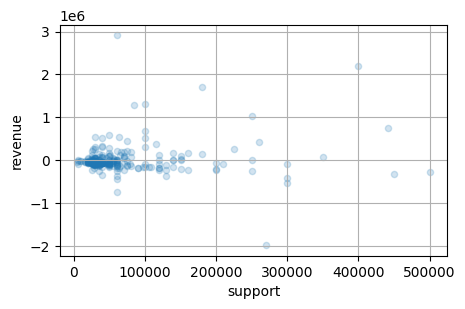

0.11205757183257078

In [67]:
gos_film.plot(x='support',y='revenue', kind='scatter', figsize=(5, 3), grid=True, alpha=0.2)
plt.show()
gos_film['revenue'].corr(gos_film['support'])

<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
Зависимость прибыльности фильма от гос поддержки отсуствует. В целом на график видим равномерное распредление как прибыльных (в положительной зоне оси У) так и убыточных (в отрицательной зоне оси У) фильмов.
При этом есть несколько аномальных значений, получивших высокую прибыль при сопоставимой с другими фильмами гос. поддержкой.
Выведем их на экран ниже

In [68]:
#топ-5 наиболее прибыльных фильмов
gos_film[['title','revenue','support','box_office','budget']].sort_values(by='revenue',ascending=False).head(5)

,title,revenue,support,box_office,budget
6883,Холоп,"2,913,569.0","60,000.0","3,073,569.0","160,000.0"
5123,Движение вверх,"2,189,494.0","400,000.0","2,779,686.0","590,192.0"
6007,Т-34,"1,707,969.0","180,000.0","2,271,754.0","563,785.0"
4976,Последний богатырь,"1,302,560.0","100,000.0","1,655,038.0","352,478.0"
5178,Лёд,"1,297,147.0","85,000.0","1,445,732.0","148,585.0"


### Анализируем рейтинг фильмов с гос. поддержкой

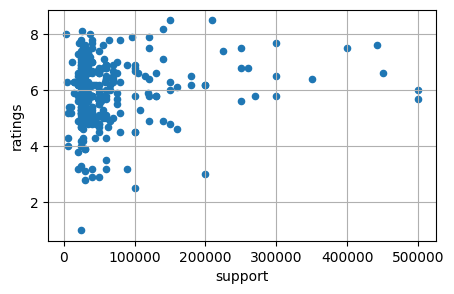

0.11828742671998188

In [69]:
gos_film.plot(x='support',y='ratings', kind='scatter', figsize=(5, 3), grid=True)
plt.show()
gos_film['ratings'].corr(gos_film['support'])

<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
Зависимость рейтинга от гос поддержки отсуствует.

### Анализируем насколько часто и какие суммы получали из бюджета продюсеры и директоры

In [70]:
dir_proc = gos_film.pivot_table(
    index=['director','producer_main','ratings','year','title','financing_source'], values=['support','revenue'], aggfunc=['sum','count']
)
dir_proc.columns = ['sum_revenue','sum_support','revenue_count', 'support_count']

In [71]:
display(dir_proc.sort_values(by='sum_support',ascending=False).head(10))
display(dir_proc.sort_values(by='sum_revenue',ascending=False).head(10))

,,,,,,sum_revenue,sum_support,revenue_count,support_count
director,producer_main,ratings,year,title,financing_source,,,,
А.Кравчук,,6.0,"2,019.0",Союз спасения,Фонд кино,"-262,297.0","500,000.0",1,1
Ф.Бондарчук,,5.7,"2,019.0",Вторжение,Фонд кино,0.0,"500,000.0",0,1
А.Мизгирев,А.Роднянский,6.6,"2,016.0",Дуэлянт,Фонд кино,"-319,916.0","450,000.0",1,1
Н.Лебедев,Л.Верещагин,7.6,"2,016.0",Экипаж .,Фонд кино,"766,971.0","442,104.0",1,1
А.Мегердичев,Л.Верещагин,7.5,"2,017.0",Движение вверх,Фонд кино,"2,189,494.0","400,000.0",1,1
И.Шурховецкий,"ООО ""Централ Партнершип""",6.4,"2,017.0",Легенда о Коловрате,Фонд кино,"90,392.0","350,000.0",1,1
Н.Хомерики,И.Толстунов,6.5,"2,016.0",Ледокол,Фонд кино,"-92,930.0","300,000.0",1,1
А.Учитель,А.Учитель,7.7,"2,017.0",Матильда,Фонд кино,"-521,130.0","300,000.0",1,1
Н.Хомерики,С.Мелькумов,5.8,"2,019.0",Девятая,Фонд кино,"-397,828.0","300,000.0",1,1


,,,,,,sum_revenue,sum_support,revenue_count,support_count
director,producer_main,ratings,year,title,financing_source,,,,
К.Шипенко,Э.Илоян,6.8,"2,019.0",Холоп,Фонд кино,"2,913,569.0","60,000.0",1,1
А.Мегердичев,Л.Верещагин,7.5,"2,017.0",Движение вверх,Фонд кино,"2,189,494.0","400,000.0",1,1
А.Сидоров,А.Златопольский,6.5,"2,018.0",Т-34,Фонд кино,"1,707,969.0","180,000.0",1,1
Д.Дьяченко,Э.Илоян,6.8,"2,017.0",Последний богатырь,Фонд кино,"1,302,560.0","100,000.0",1,1
Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",5.6,"2,016.0",Притяжение (2016),Фонд кино,"1,038,321.0","250,000.0",1,1
Н.Лебедев,Л.Верещагин,7.6,"2,016.0",Экипаж .,Фонд кино,"766,971.0","442,104.0",1,1
"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпиловский, А.Черномазов (А.Нужный)",Т.Бекмамбетов,5.8,"2,017.0",Ёлки Новые,Фонд кино,"681,069.0","100,000.0",1,1
К.Феоктистов,С.Сельянов,5.5,"2,017.0",Три богатыря и принцесса Египта,Фонд кино,"584,763.0","50,000.0",1,1
А.Першин (псевдоним Ж.Крыжовников),Т.Бекмамбетов,4.7,"2,015.0",Самый Лучший День,Фонд кино,"552,410.0","63,000.0",1,1


<div style="border:solid steelblue 3px; padding: 4px; border-radius: 10px">
В целом видим, что у многих продюсеров был шанс реализовать фильм с использованием бюджетных средств. 

Наибольшего успеха достиг главный продюсер Э.Илоян, суммарно его фильмы "Холоп" и "Последний богатырь" принесли более 4 млрд. руб. чистой прибыли.

Можно с уверенностью сказать, что Э.Илоян разбирается в талантах.

# 5 Общий вывод

Перед нами поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. Заказчиком этого исследования ялвяется Министерство культуры Российской Федерации.

Описание данных:

   У одного фильма может быть несколько прокатных удостоверений. 

    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма;
    box_office — сборы в рублях.

**Выполнена предобработка данных:**
* заполнены пропущенные значения там где это возможно
* добавлены новые столбцы
* изменены типы данных
* исправлены не явные дубликаты

**Выявлены следующие тренды:**
1. Доля фильмов, по которым имеются сведения о показах в российских кинотеатрах росла на протяжении периода с 2010 по 2017 годы с 11% до 71%. Затем эта доля снизилась с 2017 по 2019 год с 71% до 57%. Таким образом, наиболее полная информация о показах была в 2017 году.
2. На протяжении почти всего исследуемого периода кассовые сборы росли.
В 2019 году сборы были максимильные и составили 49.6 млрд. руб.
В 2010 году сборы были на минимуме и составили 2.4 млн. руб.
В разрезе каждого года медианные значения кассовых сборов значительно ниже своих средних значений. Это говорит о том, что основную долю кассовых сборов как правило занимают единичные блокбастеры, а остальные фильмы в большинстве своем приносят незначительный доход в общий объем сборов
3. В период с 2015 по 2019 годы наибольшие сборы в разрезе возрастных категорий составили 76 млрд.руб. и пришлись на фильмы категории «16+» - для детей старше 16 лет. 
На протяжении всего периода фильмы данной возрастной категории занимали наибольшую долю. В основном это фильмы Марвел. Но в 2019 году доля фильмов категории «16+» сравнялась с долями фильмов категорий «6+» и «12+». Вероятно это связано с:
- выходом в прокат мощнейших ультраблокбастеров в жанре комедия (Холоп), фантастика и мультфильмов (Малефисента), которые своей мощью затмили Марвел.
- увеличением качества и уровня съемок семейных фильмов/мультфильмов, на которые ходят семьями
- ужесточением контроля возрастной категории, то есть детей перестали пускать на фильмы «16+»

4. В основном финансирование осуществляется за счет бюджета Фонда кино. В период с 2013 по 2016 объем финансирования существенно вырос. Затем в оставшиеся периоды практически не изменялся
5. Зависимость прибыльности фильма от гос поддержки отсуствует. В целом на график видим равномерное распредление как прибыльных (в положительной зоне оси У) так и убыточных (в отрицательной зоне оси У) фильмов. При этом есть несколько аномальных значений, получивших высокую прибыль при сопоставимой с другими фильмами гос. поддержкой.
6. Зависимость рейтинга от гос поддержки отсуствует.
7. У многих продюсеров был шанс реализовать фильм с использованием бюджетных средств.
Наибольшего успеха достиг главный продюсер Э.Илоян, суммарно его фильмы "Холоп" и "Последний богатырь" принесли более 4 млрд. руб. чистой прибыли.
Можно с уверенностью сказать, что Э.Илоян разбирается в талантах.